#prerequisites

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


initializing path names

In [ ]:
train_path='/content/drive/MyDrive/SDP/dataset/nsl-kdd/KDDTrain+.txt'
test_path='/content/drive/MyDrive/SDP/dataset/nsl-kdd/KDDTest+.txt'

initializing columns of dataset

In [ ]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]
print(len(columns))

43


#reading dataset

In [ ]:
train_data = pd.read_csv(train_path, names = columns)
test_data = pd.read_csv(test_path, names = columns)

data= pd.concat([train_data, test_data], ignore_index=True)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data.drop(['difficulty'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
from matplotlib import pyplot as plt

<Axes: >

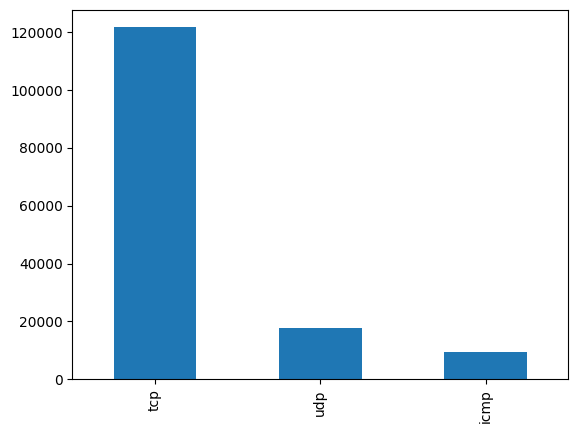

In [ ]:
data['protocol_type'].value_counts().plot(kind="bar")

<Axes: >

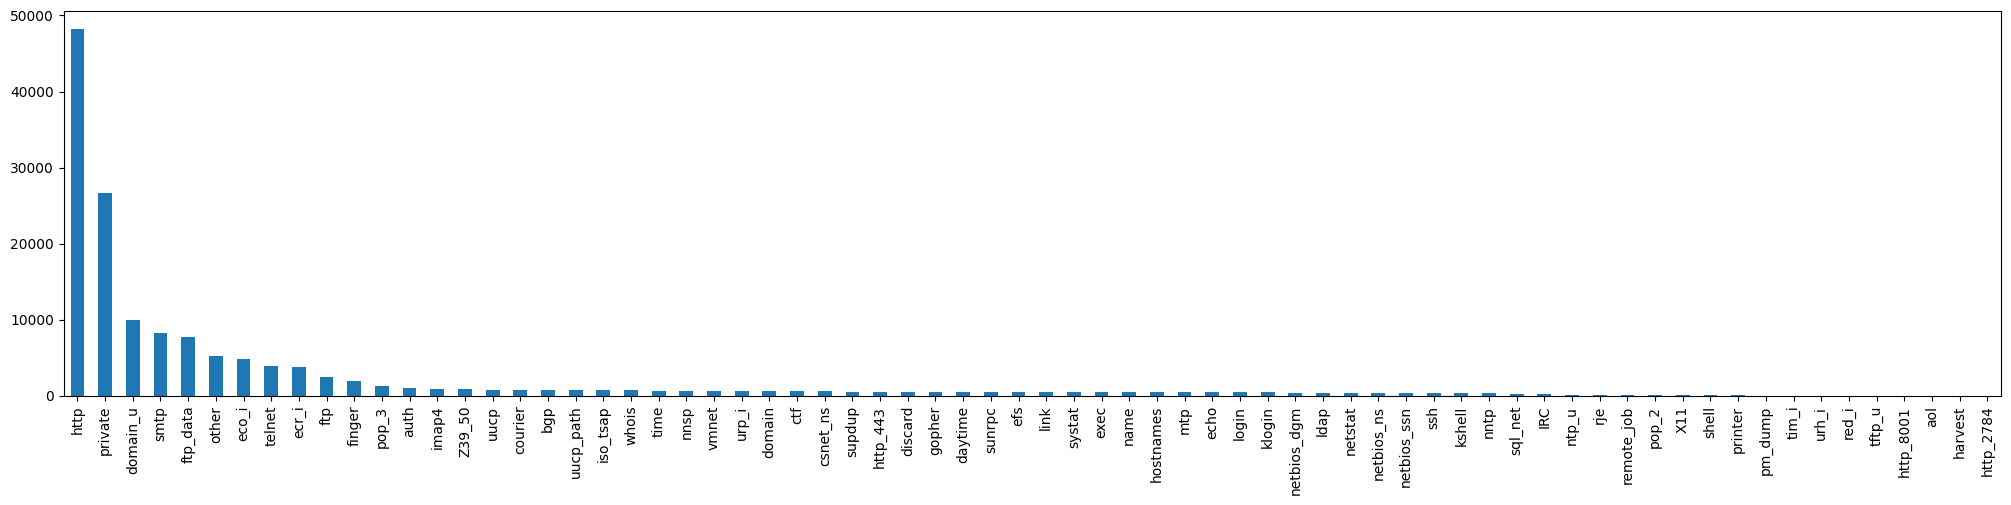

In [ ]:
data['service'].value_counts().plot(kind="bar",figsize=(25,5))

<Axes: >

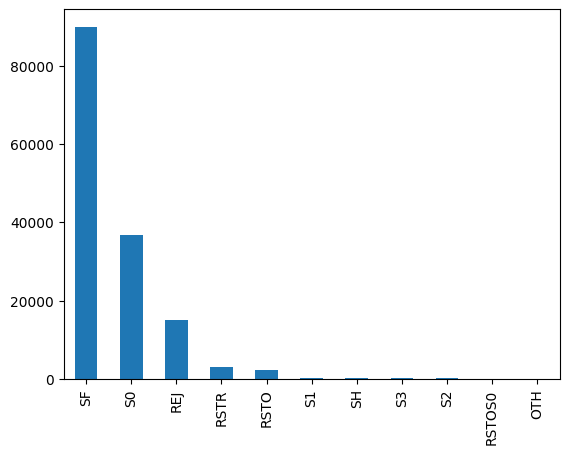

In [ ]:
data['flag'].value_counts().plot(kind="bar")

<Axes: >

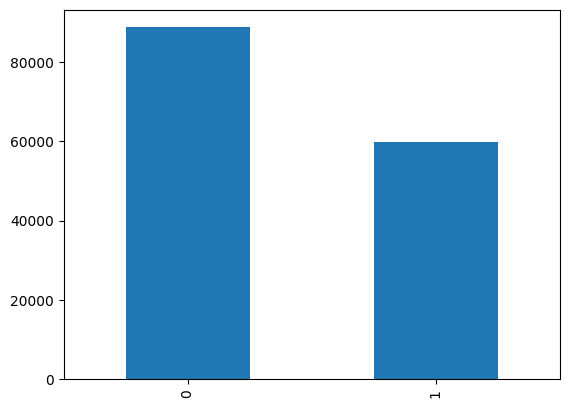

In [ ]:
data['logged_in'].value_counts().plot(kind='bar')

<Axes: >

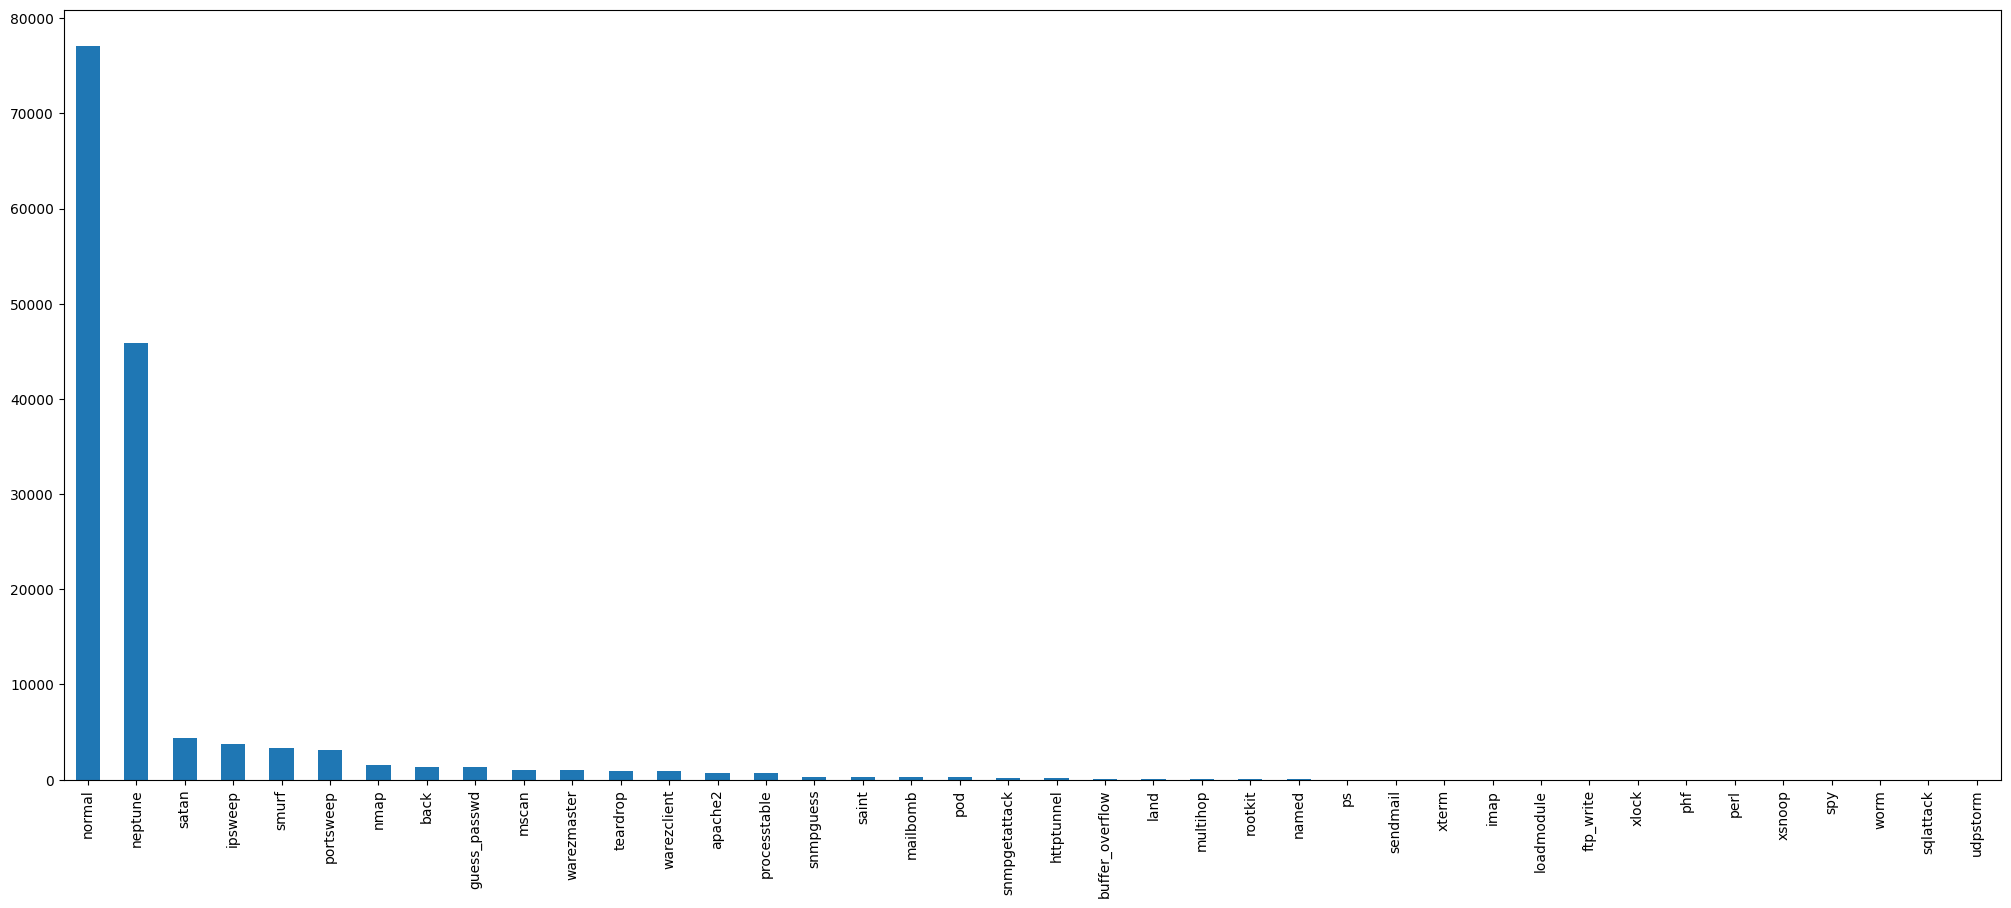

In [ ]:
data['label'].value_counts().plot(kind='bar',figsize=(25,10))

In [ ]:
data['label'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [ ]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)


<Axes: >

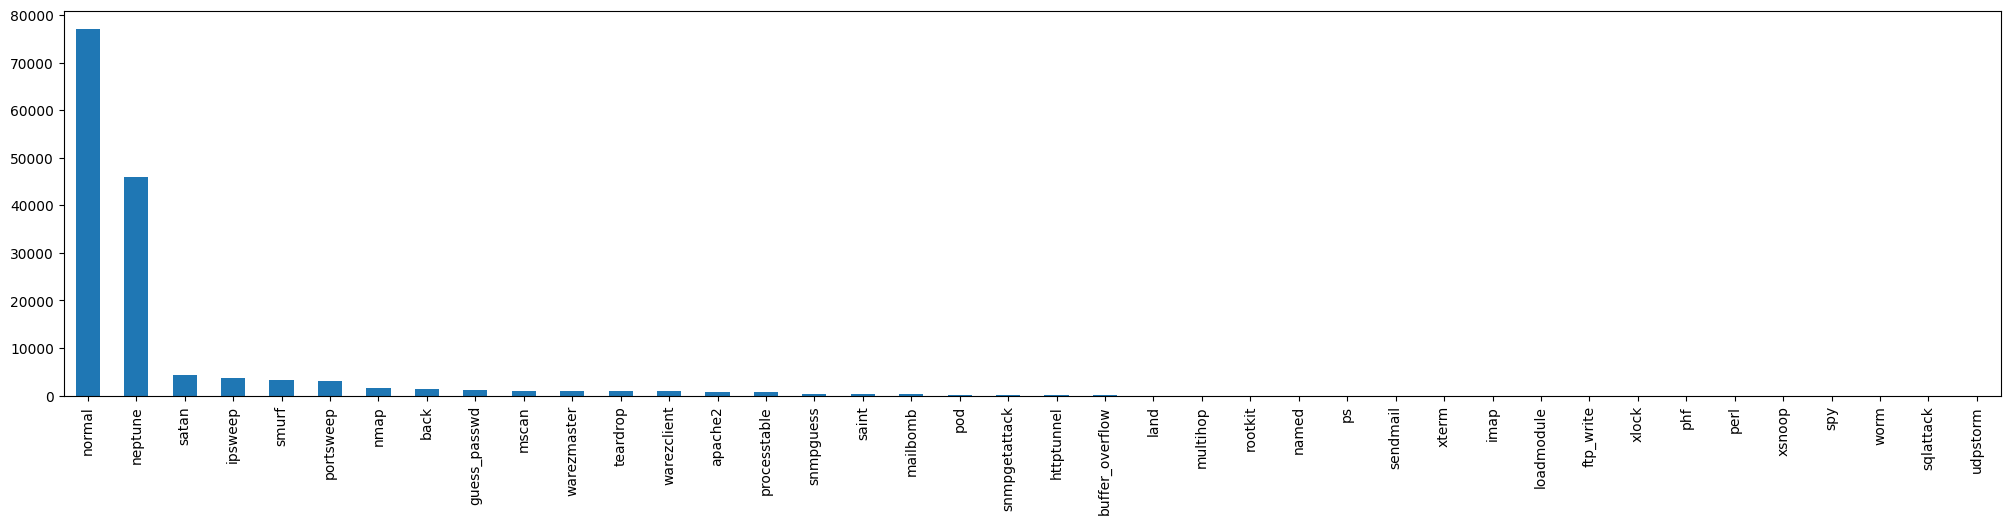

In [ ]:
data['label'].value_counts().plot(kind="bar",figsize=(25,5))

In [ ]:
change_label(data)
data.label.value_counts()

normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: label, dtype: int64

<Axes: >

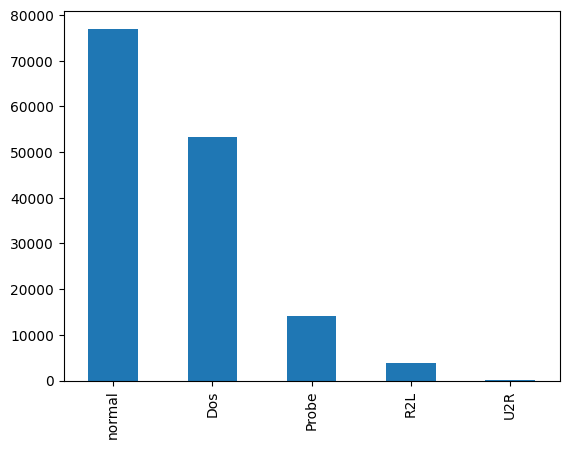

In [ ]:
data['label'].value_counts().plot(kind="bar")

In [ ]:
label = pd.DataFrame(data.label)

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

In [ ]:
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(148517, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,4
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,Dos,0
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,4
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,tcp,smtp,SF,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,...,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148513,-0.112481,tcp,http,SF,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148514,-0.112481,tcp,http,SF,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,Dos,0
148515,-0.112481,udp,domain_u,SF,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,...,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4


In [ ]:
data.drop(labels= ['label'], axis=1, inplace=True)
print(data.shape)

(148517, 42)


In [ ]:
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
print(data.shape)

(148517, 123)


In [ ]:
y_data= data['intrusion']
X_data= data.drop(labels=['intrusion'], axis=1)

In [ ]:
Y=data['intrusion']
X=data.drop(labels=['intrusion'], axis=1)

In [ ]:
print('X_train has shape:',X_data.shape,'\ny_train has shape:',y_data.shape)

X_train has shape: (148517, 122) 
y_train has shape: (148517,)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

X_data=np.array(X_data)
y_data=np.array(y_data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(103961, 122) (44556, 122)
(103961,) (44556,)


<Axes: >

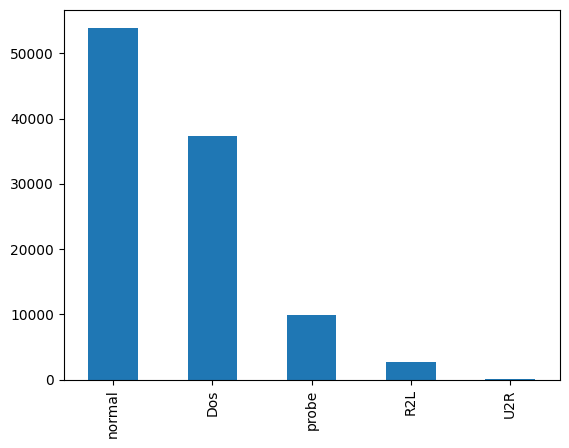

In [ ]:

#Y_train.value_counts().plot(kind='bar')

#x=['u2r','normal','d','p','r']
#x1 = [4,0,1,2,3]
d={4:'normal',0:'Dos',1:'probe',2:'R2L',3:'U2R'}
Y_train.map(d).value_counts().plot(kind='bar')

In [ ]:
Y_train.map(d).value_counts()

normal    53952
Dos       37306
probe      9933
R2L        2683
U2R          87
Name: intrusion, dtype: int64

#Applying Augmentation

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

X_train_resampled, Y_train_resampled = adasyn.fit_resample(X_train, Y_train)

In [ ]:
print(X_train.shape, X_train_resampled.shape)
print(Y_train.shape, Y_train_resampled.shape)
Y_train_resampled.value_counts()

(103961, 122) (269813, 122)
(103961,) (269813,)


0    54038
1    54037
4    53952
3    53949
2    53837
Name: intrusion, dtype: int64

In [ ]:
Y_train_resampled.map(d).value_counts()

Dos       54038
probe     54037
normal    53952
U2R       53949
R2L       53837
Name: intrusion, dtype: int64

<Axes: >

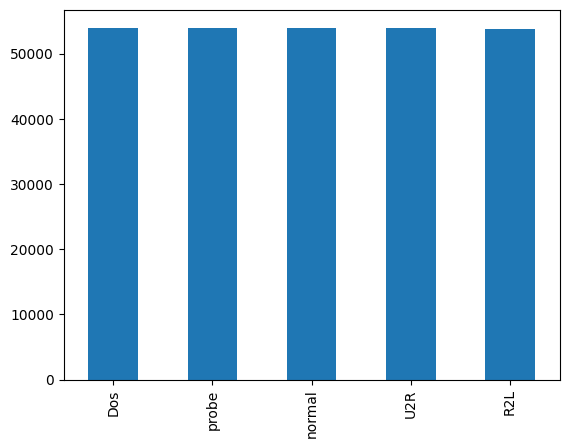

In [ ]:
Y_train_resampled.map(d).value_counts().plot(kind='bar')

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model=GaussianNB()

gnb_model.fit(X_train, Y_train.values.ravel())
Y_test_gnb_pred = gnb_model.predict(X_test)

print("Train score is:", gnb_model.score(X_train, Y_train))
print("Test score is:",gnb_model.score(X_test,Y_test))


print("Precision: ",precision_score(Y_test, Y_test_gnb_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_gnb_pred,average='macro'))

Train score is: 0.7618818595434826
Test score is: 0.7618053685250022
Precision:  0.8613905494306339
Recall:  0.6802406089877265


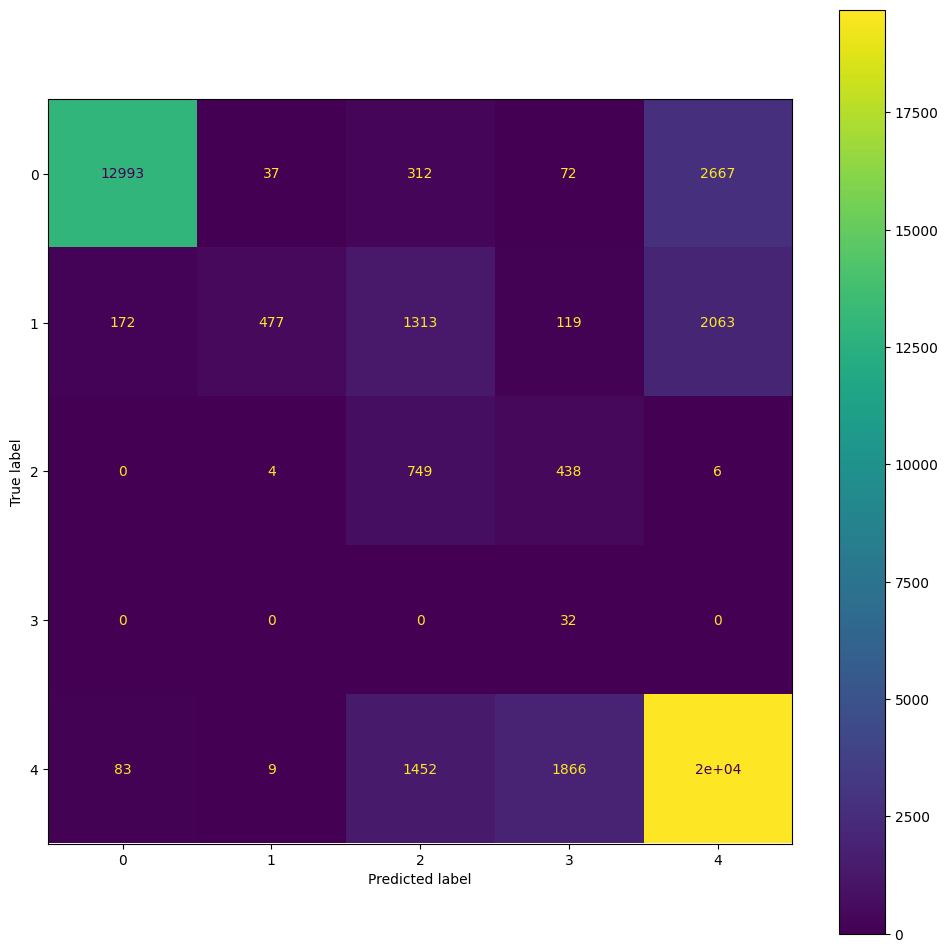

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(Y_test, Y_test_gnb_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
#for resampled data

from sklearn.naive_bayes import GaussianNB

gnb_re_model=GaussianNB()

gnb_re_model.fit(X_train_resampled, Y_train_resampled.values.ravel())
Y_test_gnb_re_pred = gnb_re_model.predict(X_test)

print("Train score is:", gnb_re_model.score(X_train_resampled, Y_train_resampled))
print("Test score is:",gnb_re_model.score(X_test,Y_test))


print("Precision: ",precision_score(Y_test, Y_test_gnb_re_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_gnb_re_pred,average='macro'))

Train score is: 0.5334832426345016
Test score is: 0.44669629230631114
Precision:  0.7332116372147452
Recall:  0.547124454974661


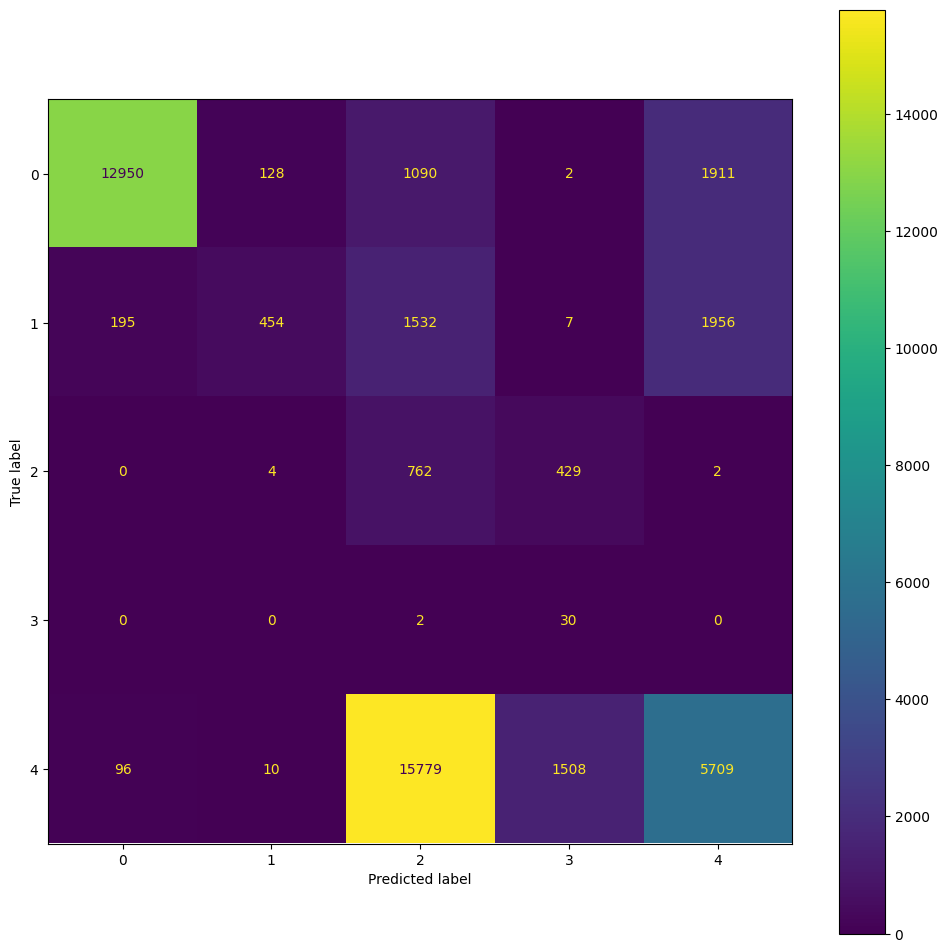

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(Y_test, Y_test_gnb_re_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#fitting/training the model
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_model.fit(X_train, Y_train.values.ravel())

#predicting
Y_test_dt_pred = dt_model.predict(X_test)

#checking score
print("Train score is:", dt_model.score(X_train, Y_train))
print("Test score is:",dt_model.score(X_test,Y_test))
print("Precision: ",precision_score(Y_test, Y_test_dt_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_dt_pred,average='weighted'))

Train score is: 0.8842354344417618
Test score is: 0.8826645120746925
Precision:  0.88925289589549
Recall:  0.8826645120746925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


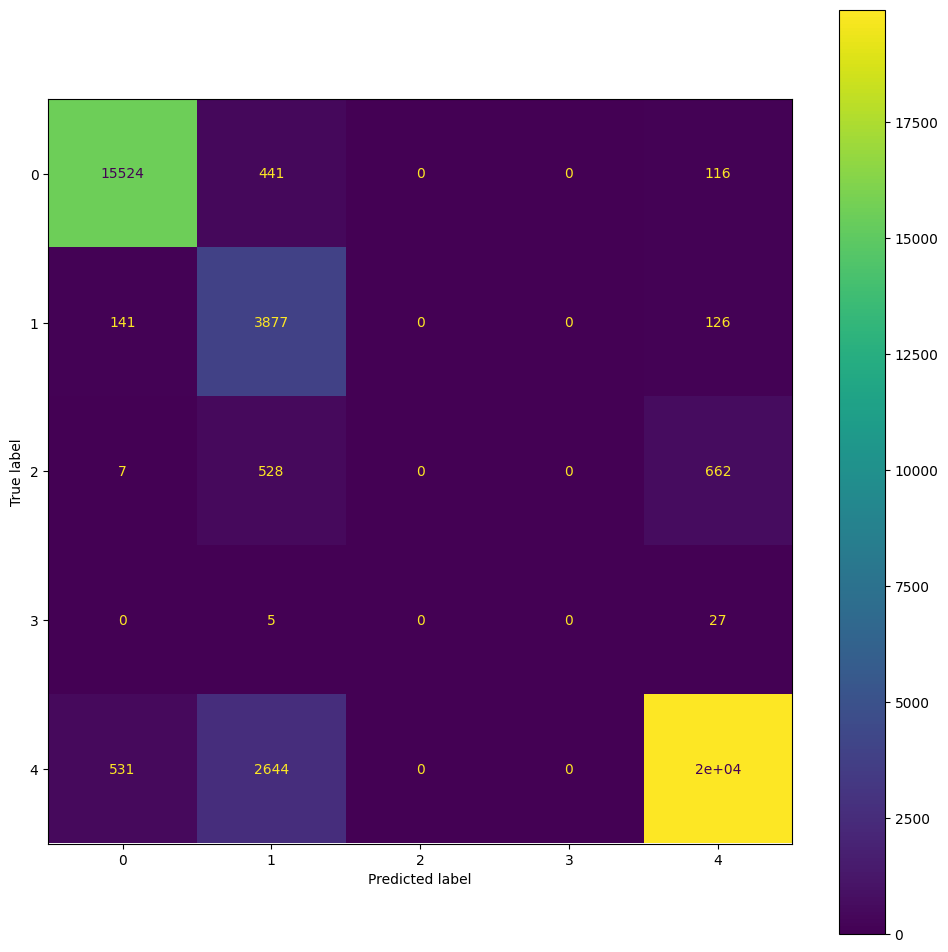

In [ ]:
cm = confusion_matrix(Y_test, Y_test_dt_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
#for resampled data

from sklearn.tree import DecisionTreeClassifier

#fitting/training the model
dt_re_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_re_model.fit(X_train_resampled, Y_train_resampled.values.ravel())

#predicting
Y_test_dt_re_pred = dt_re_model.predict(X_test)

#checking score
print("Train score is:", dt_re_model.score(X_train_resampled, Y_train_resampled))
print("Test score is:",dt_re_model.score(X_test,Y_test))
print("Precision: ",precision_score(Y_test, Y_test_dt_re_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_dt_re_pred,average='weighted'))

Train score is: 0.6790295500958071
Test score is: 0.701207469252177
Precision:  0.8620373826083272
Recall:  0.701207469252177


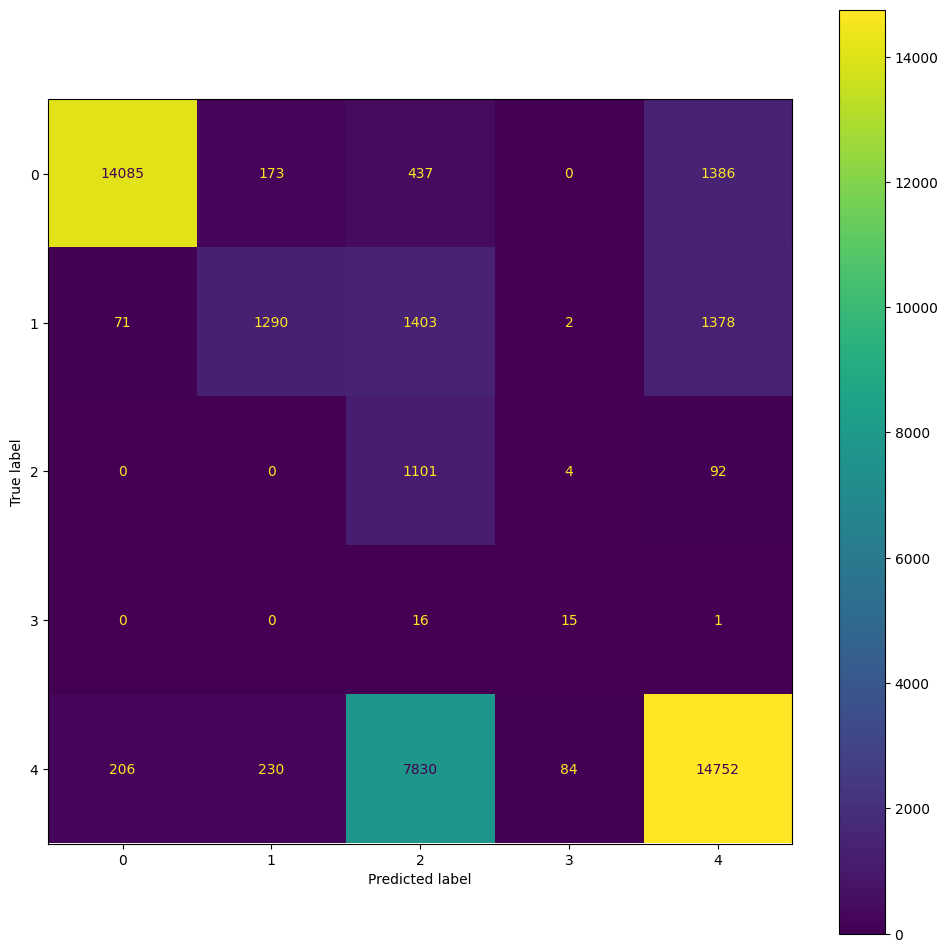

In [ ]:
cm = confusion_matrix(Y_test, Y_test_dt_re_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(gamma = 'scale')

svm_model.fit(X_train, Y_train.values.ravel())

Y_test_svm_pred = svm_model.predict(X_test)

print("Training score:", svm_model.score(X_train, Y_train))
print("Testing score:", svm_model.score(X_test,Y_test))
print("Precision: ",precision_score(Y_test, Y_test_svm_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_svm_pred,average='micro'))

Training score: 0.8682610786737335
Testing score: 0.8634014812819822
Precision:  0.832616487797875
Recall:  0.8516014812819822


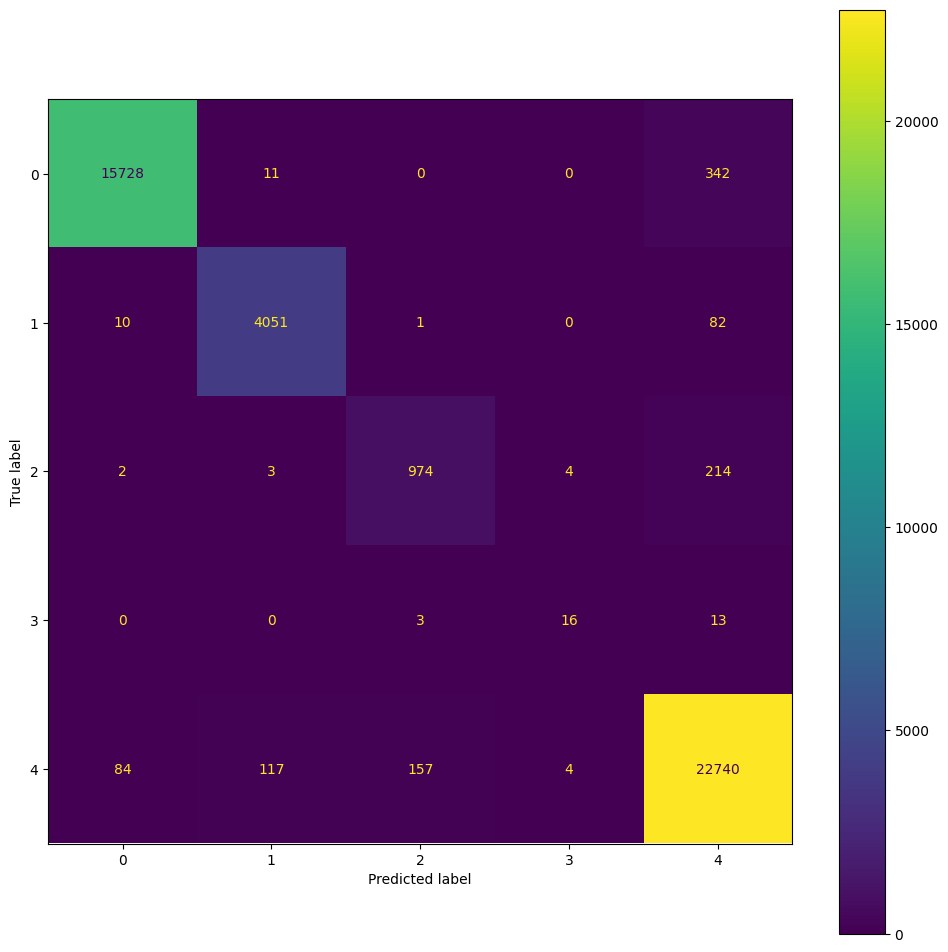

In [ ]:
cm = confusion_matrix(Y_test, Y_test_svm_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm_re_model = SVC(gamma = 'scale')

svm_re_model.fit(X_train_resampled, Y_train_resampled.values.ravel())

Y_test_svm_re_pred = svm_re_model.predict(X_test)

print("Training score:", svm_re_model.score(X_train_resampled, Y_train_resampled))
print("Testing score:", svm_re_model.score(X_test,Y_test))
print("Precision: ",precision_score(Y_test, Y_test_svm_re_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_svm_re_pred,average='micro'))

Training score: 0.9545166467145764
Testing score: 0.9409282700421941
Precision:  0.9667421849769114
Recall:  0.9409282700421941


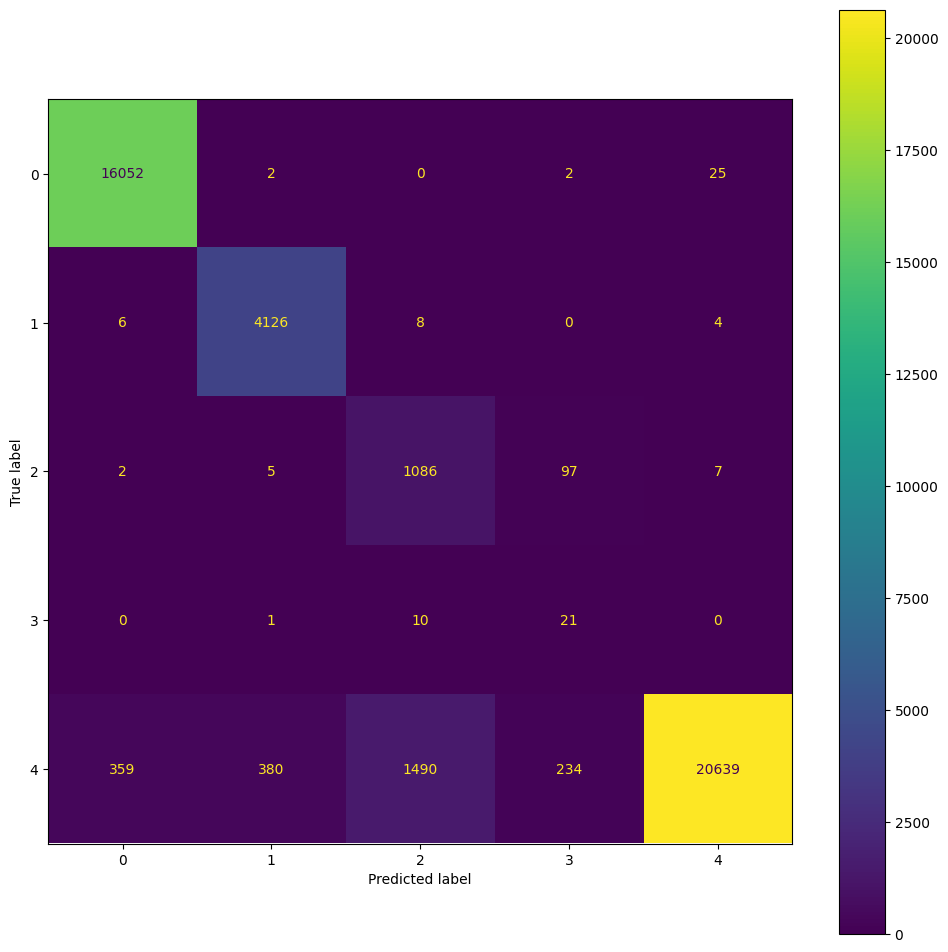

In [ ]:
cm = confusion_matrix(Y_test, Y_test_svm_re_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
#for resampled data

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1200000)

lr_model.fit(X_train, Y_train.values.ravel())
Y_test_lr_pred = lr_model.predict(X_test)

print("Train score is:", lr_model.score(X_train, Y_train))
print("Test score is:",lr_model.score(X_test,Y_test))
print("Accuracy: ",accuracy_score(Y_test,Y_test_lr_pred))
print("Precision: ",precision_score(Y_test, Y_test_lr_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_lr_pred,average='weighted'))

Train score is: 0.9642173507372958
Test score is: 0.9629006194451926
Accuracy:  0.9629006194451926
Precision:  0.9622641503074593
Recall:  0.9629006194451926


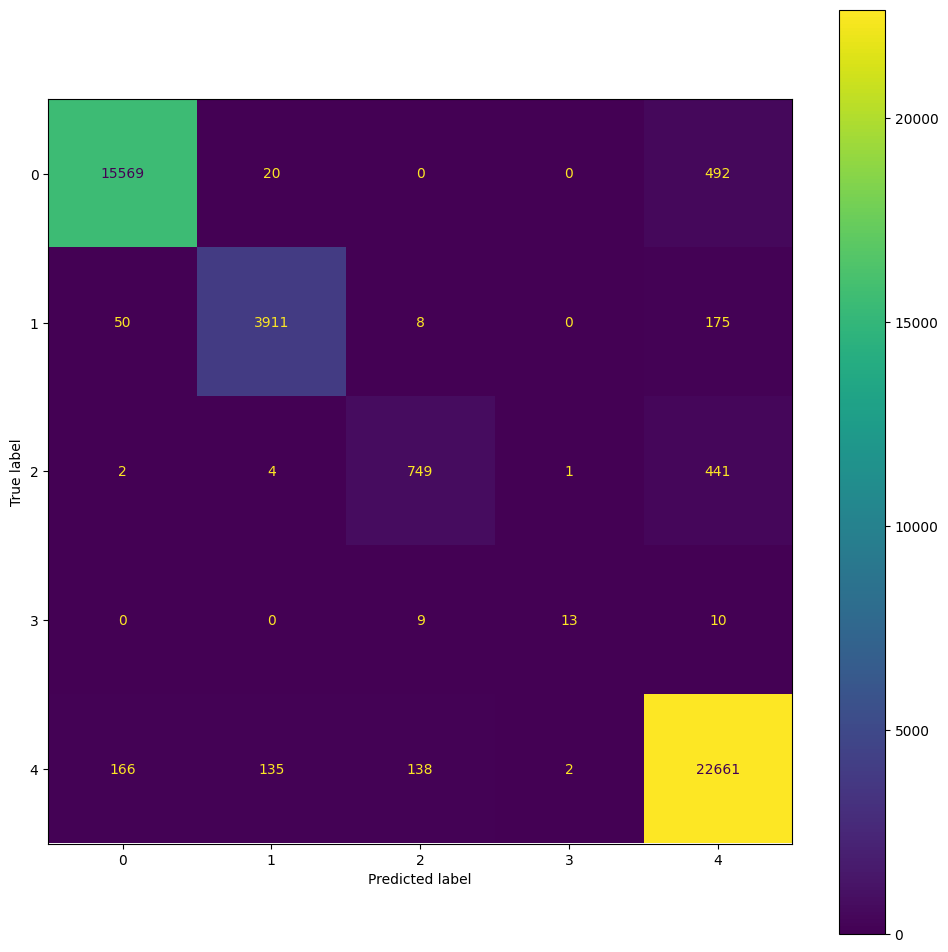

In [ ]:
cm = confusion_matrix(Y_test, Y_test_lr_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
#for resampled data

from sklearn.linear_model import LogisticRegression

lr_re_model = LogisticRegression(max_iter=1200000)

lr_re_model.fit(X_train_resampled, Y_train_resampled.values.ravel())
Y_test_lr_re_pred = lr_re_model.predict(X_test)

print("Train score is:", lr_re_model.score(X_train_resampled, Y_train_resampled))
print("Test score is:",lr_re_model.score(X_test,Y_test))
print("Accuracy: ",accuracy_score(Y_test,Y_test_lr_re_pred))
print("Precision: ",precision_score(Y_test, Y_test_lr_re_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,Y_test_lr_re_pred,average='weighted'))

Train score is: 0.9024027752554548
Test score is: 0.8970284585689918
Accuracy:  0.8970284585689918
Precision:  0.943805870966668
Recall:  0.8970284585689918


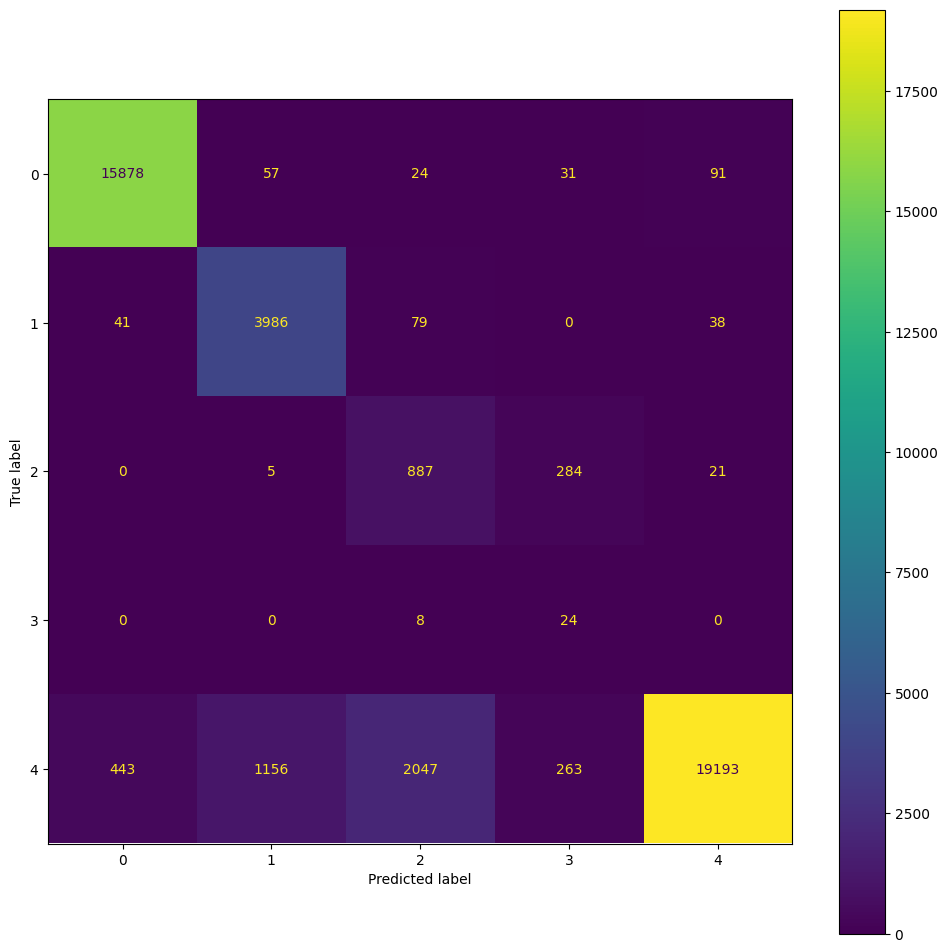

In [ ]:
cm = confusion_matrix(Y_test, Y_test_lr_re_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier(objective='multi:softmax',booster='gbtree',verbosity=0,silent=0,learning_rate=0.1)

# Fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)
print("Precision: ",precision_score(Y_test, y_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,y_pred,average='weighted'))

Accuracy: 0.9151746117245713
Precision:  0.9241384939964713
Recall:  0.9133746117245713


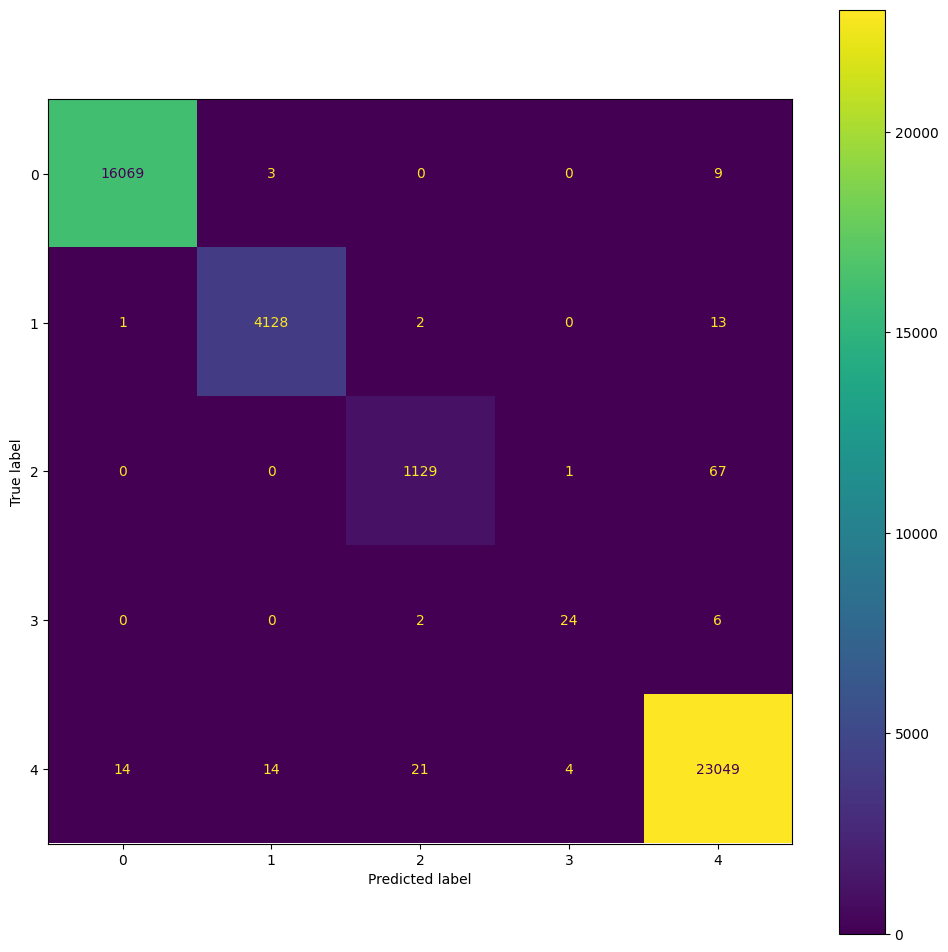

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
# for resampled data
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_re_clf = xgb.XGBClassifier(objective='multi:softmax',booster='gbtree',verbosity=0,silent=0,learning_rate=0.1)

# Fit the classifier to the training data
xgb_re_clf.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
y_re_pred = xgb_re_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_re_pred)
print('Accuracy:', accuracy)
print("Precision: ",precision_score(Y_test, y_re_pred,average='weighted'))
print("Recall: ",recall_score(Y_test,y_re_pred,average='weighted'))

Accuracy: 0.939653469790825
Precision:  0.9412113151532863
Recall:  0.939653469790825


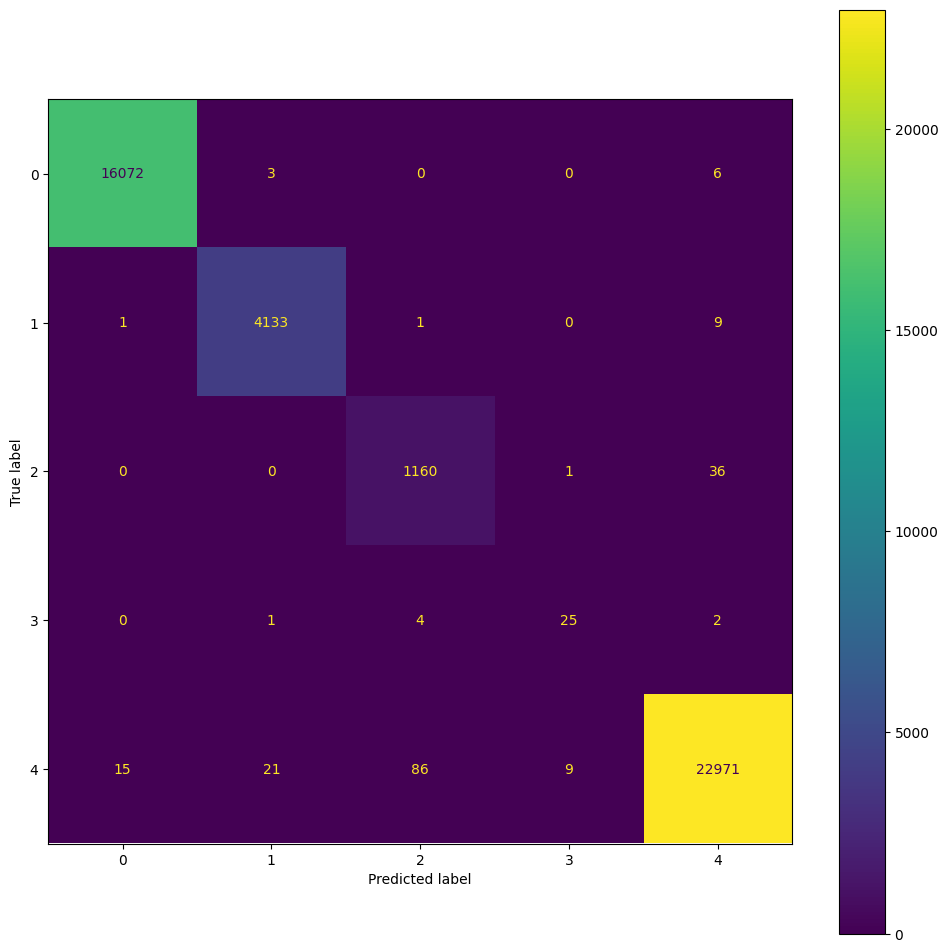

In [ ]:
cm = confusion_matrix(Y_test, y_re_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(118813, 122) 
 (29704, 122)


In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
print(X_train_resampled.shape)

(307832, 122)


In [ ]:
X_train

array([[-0.11248106, -0.00720589, -0.00452458, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.0073706 , -0.0034691 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.00726616, -0.00452512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.11248106, -0.00743641, -0.00459182, ...,  0.        ,
         1.        ,  0.        ],
       [-0.09216143, -0.00739463, -0.00390814, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.00742846, -0.00459533, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train_resampled

array([[-0.11248106, -0.00720589, -0.00452458, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.0073706 , -0.0034691 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.00726616, -0.00452512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.11248106, -0.00742482, -0.00461423, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.00743398, -0.00399296, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11248106, -0.00741731, -0.00461423, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_train_resampled = np.reshape(X_train_resampled, ( X_train_resampled.shape[0], 1 , X_train_resampled.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))

In [ ]:
#X_train
X_train.shape

(118813, 1, 122)

In [ ]:
#LSTM model

model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 64)             47872     
                                                                 
 dropout_6 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_7 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_11 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)               

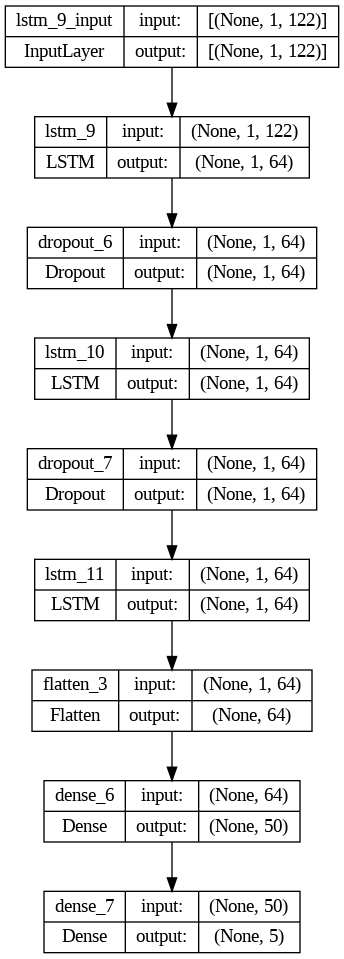

In [ ]:
from keras.utils import plot_model



# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 16s 403ms/step - loss: 1.5129 - accuracy: 0.7670 - val_loss: 1.3201 - val_accuracy: 0.8265
Epoch 2/100
20/20 [==============================] - 7s 341ms/step - loss: 0.9396 - accuracy: 0.7913 - val_loss: 0.5170 - val_accuracy: 0.8359
Epoch 3/100
20/20 [==============================] - 6s 294ms/step - loss: 0.4536 - accuracy: 0.8246 - val_loss: 0.3918 - val_accuracy: 0.8591
Epoch 4/100
20/20 [==============================] - 6s 292ms/step - loss: 0.3625 - accuracy: 0.8442 - val_loss: 0.3204 - val_accuracy: 0.8776
Epoch 5/100
20/20 [==============================] - 6s 323ms/step - loss: 0.2855 - accuracy: 0.8669 - val_loss: 0.2385 - val_accuracy: 0.8782
Epoch 6/100
20/20 [==============================] - 5s 262ms/step - loss: 0.2157 - accuracy: 0.8698 - val_loss: 0.1918 - val_accuracy: 0.8791
Epoch 7/100
20/20 [==============================] - 6s 329ms/step - loss: 0.1804 - accuracy: 0.8744 - val_loss: 0.1643 - val_accuracy: 0.881

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

y_p=model.predict(X_test)

y_p = np.argmax(y_p, axis=1)
#y_p=np.round(y_pred).flatten()

#y_t=np.round(y_test).flatten()
y_t = np.argmax(y_test, axis=1)

print(X_test.shape)
print(y_p.shape)
print(y_t.shape)
print('precision:',precision_score(y_t,y_p,average='weighted'))
print('recall:',recall_score(y_t,y_p,average='weighted'))


929/929 [==============================] - 4s 4ms/step - loss: 0.2196 - accuracy: 0.9397
Test results - Loss: 0.21956156194210052 - Accuracy: 93.97050738334656%
929/929 [==============================] - 5s 4ms/step
(29704, 1, 122)
(29704,)
(29704,)
precision: 0.9413731977877604
recall: 0.9397050902235389


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for resampled data

#LSTM model

model_re = Sequential() # initializing model
model_re.add(LSTM(64,return_sequences=True,input_shape = (1, X_train_resampled.shape[2])))
model_re.add(Dropout(0.2))
model_re.add(LSTM(64,return_sequences=True))
model_re.add(Dropout(0.2))
model_re.add(LSTM(64,return_sequences=True))
model_re.add(Flatten())
model_re.add(Dense(units=50))
# output layer with softmax activation
model_re.add(Dense(units=5,activation='softmax'))

model_re.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_re.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 64)             47872     
                                                                 
 dropout_8 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_9 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [ ]:
history_re = model_re.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 18s 184ms/step - loss: 1.3390 - accuracy: 0.5609 - val_loss: 4.1566 - val_accuracy: 9.2582e-04
Epoch 2/100
50/50 [==============================] - 9s 180ms/step - loss: 0.5303 - accuracy: 0.7252 - val_loss: 7.7122 - val_accuracy: 9.2582e-04
Epoch 3/100
50/50 [==============================] - 8s 164ms/step - loss: 0.2828 - accuracy: 0.8060 - val_loss: 8.1821 - val_accuracy: 9.2582e-04
Epoch 4/100
50/50 [==============================] - 9s 169ms/step - loss: 0.2086 - accuracy: 0.8337 - val_loss: 7.6470 - val_accuracy: 9.2582e-04
Epoch 5/100
50/50 [==============================] - 9s 181ms/step - loss: 0.1769 - accuracy: 0.8438 - val_loss: 7.3523 - val_accuracy: 9.2582e-04
Epoch 6/100
50/50 [==============================] - 7s 144ms/step - loss: 0.1564 - accuracy: 0.8695 - val_loss: 6.9057 - val_accuracy: 9.2582e-04
Epoch 7/100
50/50 [==============================] - 9s 187ms/step - loss: 0.1412 - accuracy: 0.8744 - val_loss: 6.74

In [ ]:
test_results_re = model_re.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results_re[0]} - Accuracy: {test_results_re[1]*100}%')


y_p=model_re.predict(X_test)

y_p = np.argmax(y_p, axis=1)
#y_p=np.round(y_pred).flatten()

#y_t=np.round(y_test).flatten()
y_t = np.argmax(y_test, axis=1)

print(X_test.shape)
print(y_p.shape)
print(y_t.shape)
print('precision:',precision_score(y_t,y_p,average='weighted'))
print('recall:',recall_score(y_t,y_p,average='weighted'))



929/929 [==============================] - 5s 6ms/step - loss: 0.1335 - accuracy: 0.9549
Test results - Loss: 0.13348208367824554 - Accuracy: 95.48882246017456%
929/929 [==============================] - 5s 3ms/step
(29704, 1, 122)
(29704,)
(29704,)
precision: 0.9691643589380723
recall: 0.9548882305413412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load data
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
           "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
           "dst_host_srv_rerror_rate", "label", "difficulty"]
data = pd.read_csv(train_path, names=columns)
test_data = pd.read_csv(test_path, names=columns)
data = pd.concat([data, test_data], ignore_index=True)

# Preprocessing
le = LabelEncoder()
data["protocol_type"] = le.fit_transform(data["protocol_type"])
data["service"] = le.fit_transform(data["service"])
data["flag"] = le.fit_transform(data["flag"])
data.drop(["difficulty"], axis=1, inplace=True)

def change_label(y):
  y.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  y.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  y.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  y.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



y = data["label"]
change_label(y)

numeric_cols = data.select_dtypes(include="number").columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data = pd.get_dummies(data, columns=["protocol_type", "service", "flag"])

y = LabelEncoder().fit_transform(y)
y = pd.get_dummies(y).values

X = data.drop(["label"], axis=1).values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#resampling

from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)



In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,batch_size=128, epochs=100, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))


Epoch 1/100
929/929 [==============================] - 33s 34ms/step - loss: 0.1117 - accuracy: 0.8660 - val_loss: 0.0604 - val_accuracy: 0.8813
Epoch 2/100
929/929 [==============================] - 29s 31ms/step - loss: 0.0547 - accuracy: 0.8825 - val_loss: 0.0457 - val_accuracy: 0.8850
Epoch 3/100
929/929 [==============================] - 29s 31ms/step - loss: 0.0460 - accuracy: 0.8851 - val_loss: 0.0431 - val_accuracy: 0.8857
Epoch 4/100
929/929 [==============================] - 28s 30ms/step - loss: 0.0402 - accuracy: 0.8863 - val_loss: 0.0407 - val_accuracy: 0.8892
Epoch 5/100
929/929 [==============================] - 29s 31ms/step - loss: 0.0374 - accuracy: 0.8893 - val_loss: 0.0396 - val_accuracy: 0.8894
Epoch 6/100
929/929 [==============================] - 29s 31ms/step - loss: 0.0348 - accuracy: 0.8908 - val_loss: 0.0347 - val_accuracy: 0.8916
Epoch 7/100
929/929 [==============================] - 29s 31ms/step - loss: 0.0332 - accuracy: 0.8905 - val_loss: 0.0340 - val_ac

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


y_pred=model.predict(X_test)

y_p=np.round(y_pred).flatten()

y_t=np.round(y_test).flatten()

print(X_test.shape)
print(y_p.shape)
print(y_t.shape)
print('precision:',precision_score(y_t,y_p,average='weighted'))
print('recall:',recall_score(y_t,y_p,average='weighted'))

929/929 [==============================] - 4s 5ms/step - loss: 0.1314 - accuracy: 0.9563
Test results - Loss: 0.13142640888690948 - Accuracy: 95.62684893608093%
929/929 [==============================] - 4s 4ms/step
(29704, 122)
(148520,)
(148520,)
precision: 0.9825940865429821
recall: 0.9826286022084568


In [ ]:
#for resampled data

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled,batch_size=128, epochs=100, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))


Epoch 1/100
2405/2405 [==============================] - 90s 37ms/step - loss: 0.1882 - accuracy: 0.8357 - val_loss: 0.1175 - val_accuracy: 0.8589
Epoch 2/100
2405/2405 [==============================] - 78s 32ms/step - loss: 0.0922 - accuracy: 0.8704 - val_loss: 0.0886 - val_accuracy: 0.8699
Epoch 3/100
2405/2405 [==============================] - 78s 32ms/step - loss: 0.0722 - accuracy: 0.8774 - val_loss: 0.0783 - val_accuracy: 0.8743
Epoch 4/100
2405/2405 [==============================] - 79s 33ms/step - loss: 0.0609 - accuracy: 0.8812 - val_loss: 0.0916 - val_accuracy: 0.8731
Epoch 5/100
2405/2405 [==============================] - 78s 32ms/step - loss: 0.0530 - accuracy: 0.8937 - val_loss: 0.0723 - val_accuracy: 0.8778
Epoch 6/100
2405/2405 [==============================] - 77s 32ms/step - loss: 0.0488 - accuracy: 0.8852 - val_loss: 0.0624 - val_accuracy: 0.8821
Epoch 7/100
2405/2405 [==============================] - 78s 33ms/step - loss: 0.0438 - accuracy: 0.8870 - val_loss: 0

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


y_pred=model.predict(X_test)

y_p=np.round(y_pred).flatten()

y_t=np.round(y_test).flatten()

print(X_test.shape)
print(y_p.shape)
print(y_t.shape)
print('precision:',precision_score(y_t,y_p,average='weighted'))
print('recall:',recall_score(y_t,y_p,average='weighted'))

929/929 [==============================] - 3s 3ms/step - loss: 0.0947 - accuracy: 0.9641
Test results - Loss: 0.09470167756080627 - Accuracy: 96.40789031982422%
929/929 [==============================] - 3s 3ms/step
(29704, 122)
(148520,)
(148520,)
precision: 0.9856787547034312
recall: 0.9856854295717749
